# 📧 AI Ignite Week Task 4 – Email Class Organizer 


Build an intelligent email classification system using Naive Bayes that automatically organizes emails into categories with comprehensive data visualization and analysis!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import random
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("📚 All libraries imported successfully!")
print("🎯 Ready to build the Email Classification System!")

📚 All libraries imported successfully!
🎯 Ready to build the Email Classification System!


## 🔍 Step 1: Exploratory Data Analysis (EDA)

Let's explore our dataset and understand the distribution of email categories with comprehensive visualizations.

In [13]:
print("📈 DATASET INFORMATION")
print("=" * 25)
print(f"Dataset shape: {emails_df.shape}")
print(f"Missing values: {emails_df.isnull().sum().sum()}")

print(f"\n📊 Dataset Info:")
emails_df.info()

print(f"\n🏷️ LABEL DISTRIBUTION")
print("=" * 22)
label_counts = emails_df['label'].value_counts()
print(label_counts)

print(f"\n📝 SAMPLE EMAILS BY CATEGORY")
print("=" * 32)
for category in emails_df['label'].unique()[:3]:
    sample = emails_df[emails_df['label'] == category].iloc[0]
    print(f"\n{category}:")
    print(f"  Subject: {sample['subject']}")
    print(f"  Text: {sample['text']}")

emails_df['text_length'] = emails_df['text'].str.len()
emails_df['subject_length'] = emails_df['subject'].str.len()
emails_df['word_count'] = emails_df['text'].str.split().str.len()

print(f"\n📏 TEXT LENGTH STATISTICS")
print("=" * 26)
print(emails_df[['text_length', 'subject_length', 'word_count']].describe())

📈 DATASET INFORMATION
Dataset shape: (1500, 7)
Missing values: 0

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1500 non-null   int64 
 1   subject         1500 non-null   object
 2   text            1500 non-null   object
 3   label           1500 non-null   object
 4   text_length     1500 non-null   int64 
 5   subject_length  1500 non-null   int64 
 6   word_count      1500 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 82.2+ KB

🏷️ LABEL DISTRIBUTION
label
Promotion    125
Finance      125
Health       125
Travel       125
Updates      125
Events       125
Study        125
Spam         125
Social       125
Personal     125
Work         125
Alerts       125
Name: count, dtype: int64

📝 SAMPLE EMAILS BY CATEGORY

Promotion:
  Subject: Buy one get one free - Weekend special
  Text: CLEARAN

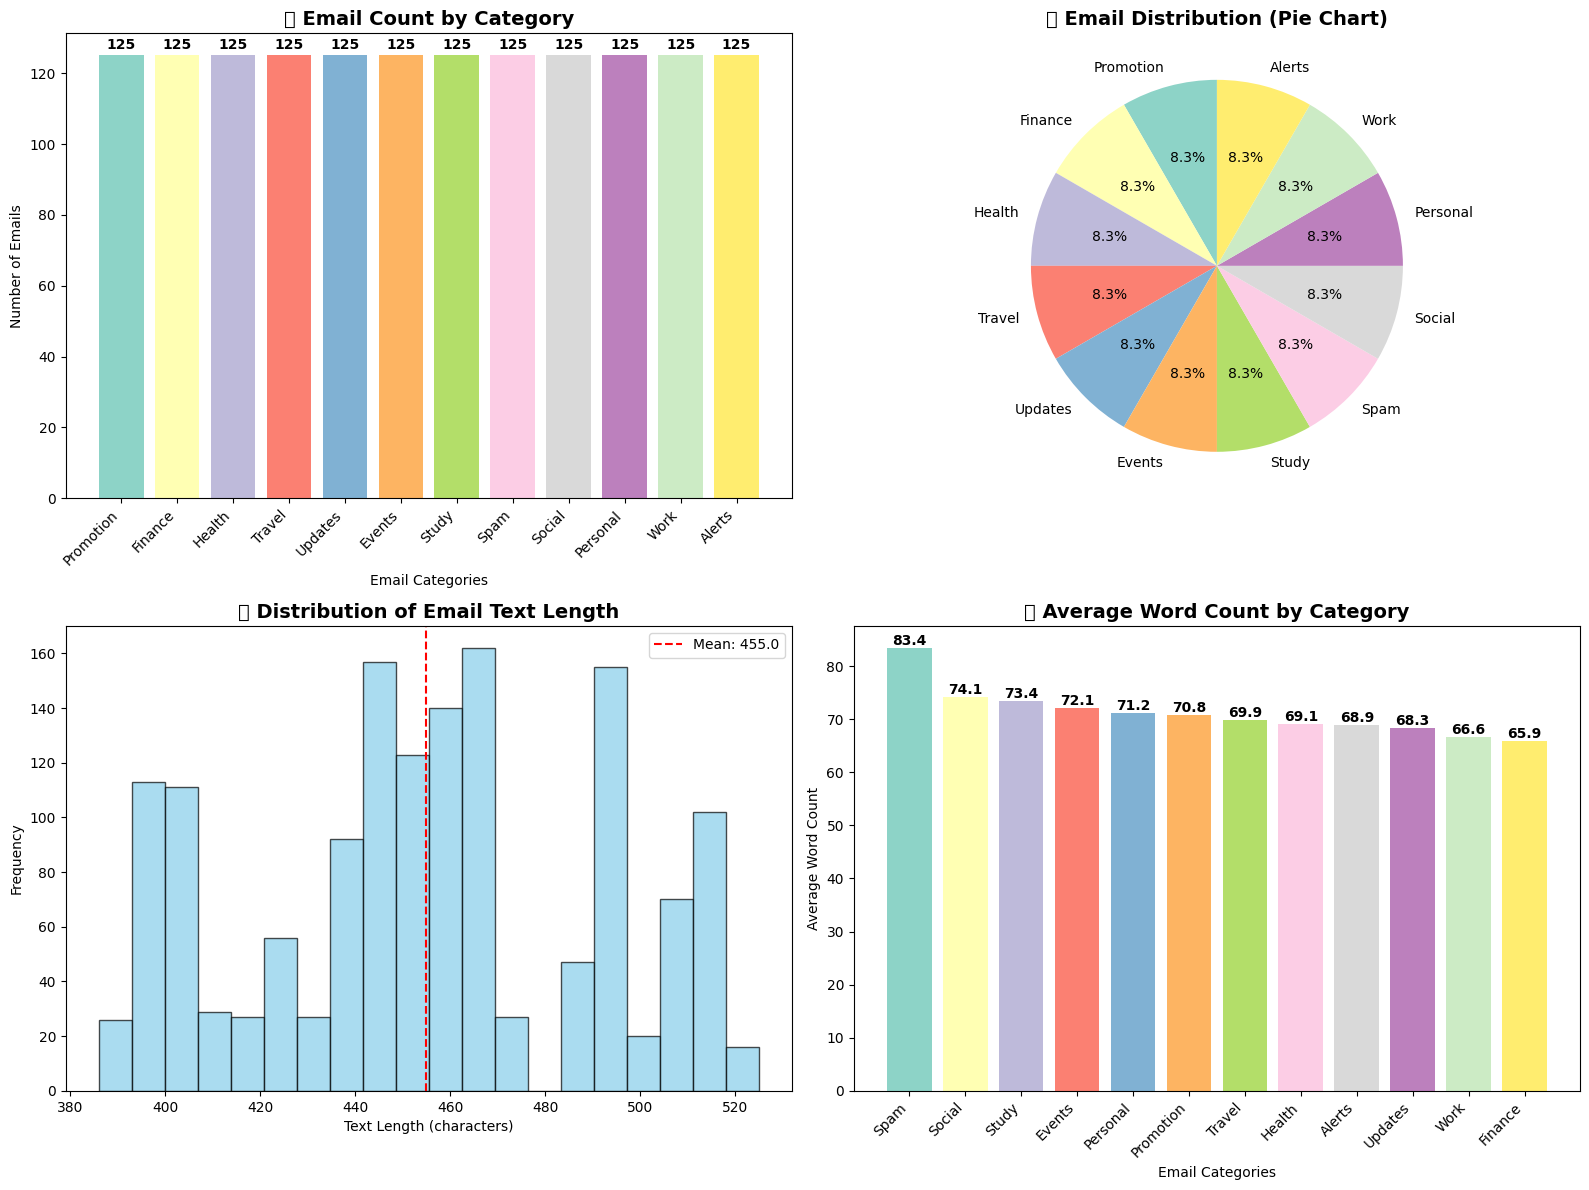

✅ Data visualization complete!
📊 Total categories: 12
📝 Average email length: 455.0 characters
🔤 Average word count: 71.1 words


In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

colors = plt.cm.Set3(np.linspace(0, 1, 12))

label_counts = emails_df['label'].value_counts()

bars = ax1.bar(range(len(label_counts)), label_counts.values, color=colors)
ax1.set_title('📊 Email Count by Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Email Categories')
ax1.set_ylabel('Number of Emails')
ax1.set_xticks(range(len(label_counts)))
ax1.set_xticklabels(label_counts.index, rotation=45, ha='right')

for bar, count in zip(bars, label_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
             f'{count}', ha='center', va='bottom', fontweight='bold')

ax2.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax2.set_title('📈 Email Distribution (Pie Chart)', fontsize=14, fontweight='bold')

ax3.hist(emails_df['text_length'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax3.set_title('📏 Distribution of Email Text Length', fontsize=14, fontweight='bold')
ax3.set_xlabel('Text Length (characters)')
ax3.set_ylabel('Frequency')
ax3.axvline(emails_df['text_length'].mean(), color='red', linestyle='--', 
            label=f'Mean: {emails_df["text_length"].mean():.1f}')
ax3.legend()

word_count_by_category = emails_df.groupby('label')['word_count'].mean().sort_values(ascending=False)
bars4 = ax4.bar(range(len(word_count_by_category)), word_count_by_category.values, 
                color=colors[:len(word_count_by_category)])
ax4.set_title('📝 Average Word Count by Category', fontsize=14, fontweight='bold')
ax4.set_xlabel('Email Categories')
ax4.set_ylabel('Average Word Count')
ax4.set_xticks(range(len(word_count_by_category)))
ax4.set_xticklabels(word_count_by_category.index, rotation=45, ha='right')

for bar, count in zip(bars4, word_count_by_category.values):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{count:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Data visualization complete!")
print(f"📊 Total categories: {emails_df['label'].nunique()}")
print(f"📝 Average email length: {emails_df['text_length'].mean():.1f} characters")
print(f"🔤 Average word count: {emails_df['word_count'].mean():.1f} words")

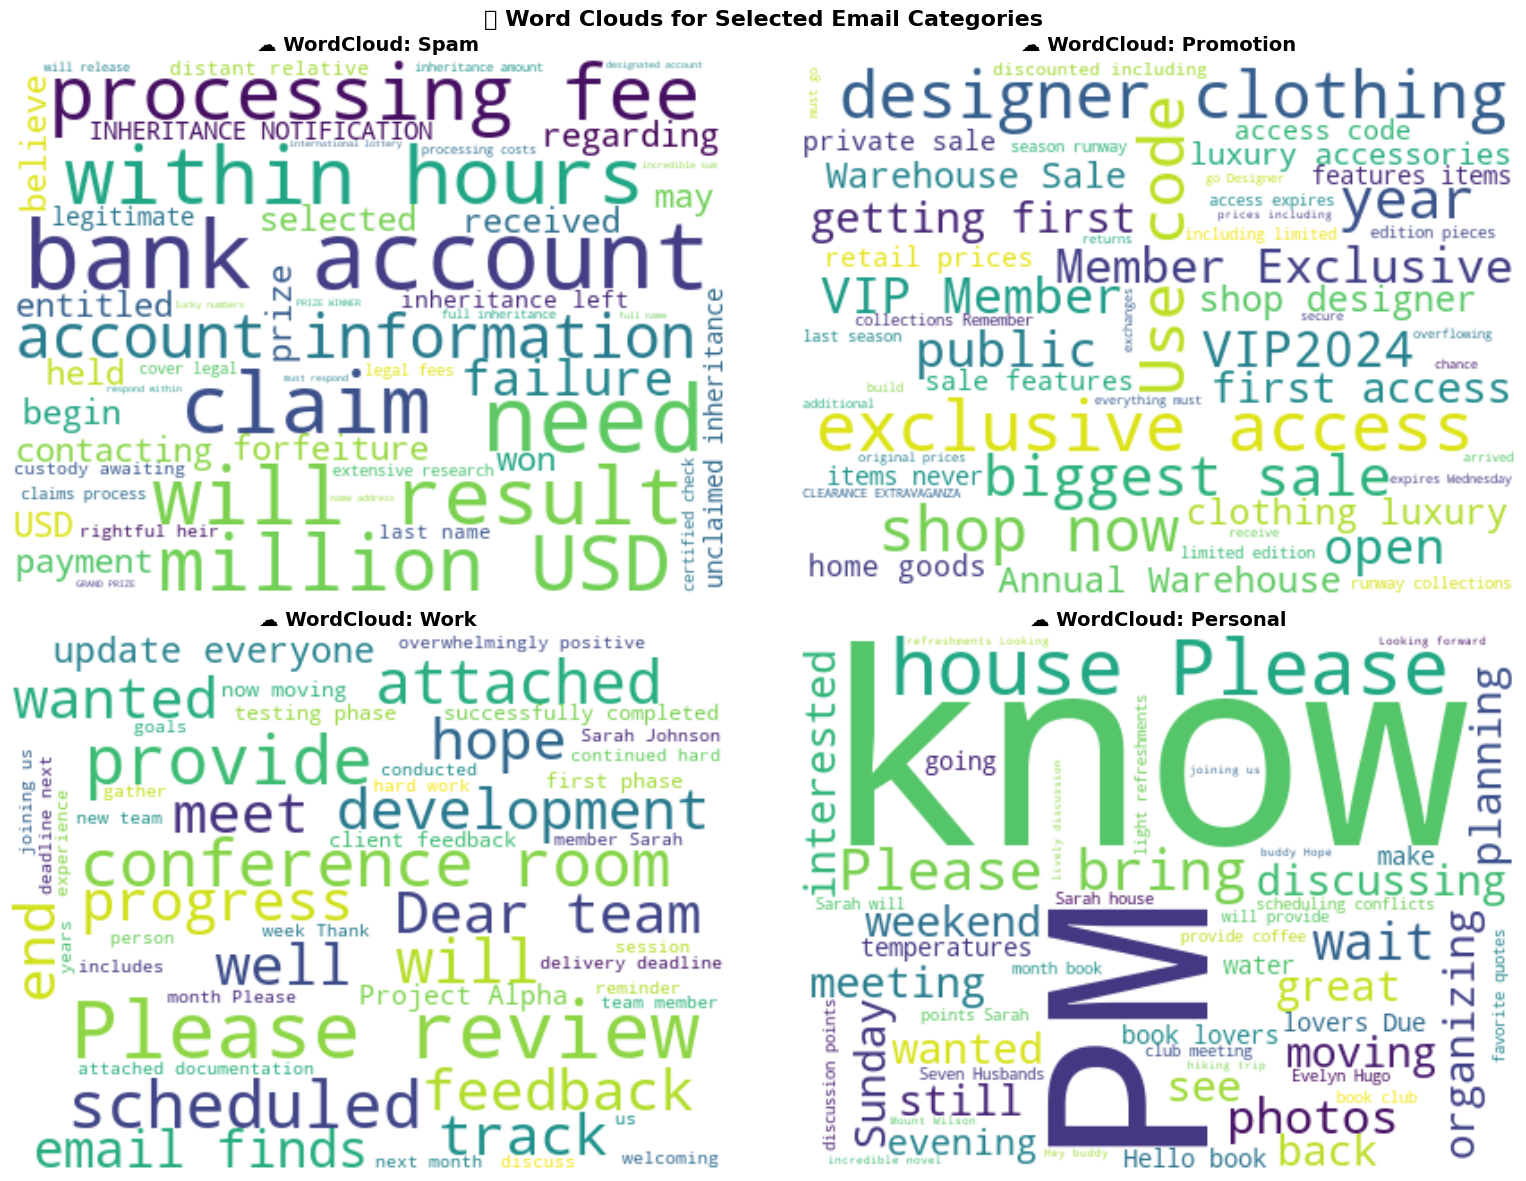

✅ Word cloud analysis complete!
🔤 Word clouds show the most frequent terms in each category

📊 DETAILED CATEGORY STATISTICS
          text_length        word_count       subject_length      
                 mean    std       mean   std           mean   std
label                                                             
Alerts         474.85  16.45      68.86  3.29          39.91  7.56
Events         494.12  13.73      72.06  4.49          42.41  6.85
Finance        418.04  21.47      65.93  3.35          36.61  3.70
Health         429.69  26.34      69.11  6.16          36.17  4.13
Personal       408.87  21.84      71.18  6.21          32.82  3.76
Promotion      440.47  17.97      70.77  5.03          39.82  5.58
Social         452.02  13.12      74.13  1.97          39.43  4.87
Spam           512.05   8.83      83.43  5.60          42.81  3.22
Study          477.62  28.94      73.40  4.29          39.79  5.32
Travel         453.13  10.95      69.87  5.70          38.41  4.82
Updat

In [16]:
selected_categories = ['Spam', 'Promotion', 'Work', 'Personal']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, category in enumerate(selected_categories):
    category_texts = emails_df[emails_df['label'] == category]['text'].str.cat(sep=' ')
    
    wordcloud = WordCloud(width=400, height=300, 
                         background_color='white',
                         colormap='viridis',
                         max_words=50).generate(category_texts)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f'☁️ WordCloud: {category}', fontsize=14, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('📝 Word Clouds for Selected Email Categories', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("✅ Word cloud analysis complete!")
print("🔤 Word clouds show the most frequent terms in each category")

category_stats = emails_df.groupby('label').agg({
    'text_length': ['mean', 'std'],
    'word_count': ['mean', 'std'],
    'subject_length': ['mean', 'std']
}).round(2)

print(f"\n📊 DETAILED CATEGORY STATISTICS")
print("=" * 35)
print(category_stats)

## 🔧 Step 2: Data Preprocessing & Model Training

Prepare the data for machine learning and train a Naive Bayes classifier with TF-IDF vectorization.

In [17]:
print("🔄 PREPROCESSING EMAIL DATA")
print("=" * 30)

emails_df['combined_text'] = emails_df['subject'] + ' ' + emails_df['text']

print("✅ Combined subject and text into one feature")
print(f"📝 Sample combined text: '{emails_df['combined_text'].iloc[0]}'")

X = emails_df['combined_text']
y = emails_df['label']

print(f"\n📊 Feature matrix shape: {X.shape}")
print(f"🎯 Target vector shape: {y.shape}")

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp  # 0.176 * 0.85 ≈ 0.15
)

print(f"\n📈 DATASET SPLITS")
print("=" * 17)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n🔧 FEATURE EXTRACTION WITH TF-IDF")
print("=" * 35)

vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    stop_words='english',
    lowercase=True
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print(f"✅ TF-IDF vectorization complete!")
print(f"📊 Feature matrix shape: {X_train_tfidf.shape}")
print(f"🔤 Vocabulary size: {len(vectorizer.vocabulary_)}")
print(f"📝 Sample features: {list(vectorizer.vocabulary_.keys())[:10]}")

🔄 PREPROCESSING EMAIL DATA
✅ Combined subject and text into one feature
📝 Sample combined text: 'Buy one get one free - Weekend special CLEARANCE EXTRAVAGANZA! Our warehouse is overflowing and everything must go! Designer clothing up to 80% off original prices, including brands like Calvin Klein, Michael Kors, and Kate Spade. Plus, take an additional 20% off already reduced clearance prices with code EXTRA20. This is your chance to build a designer wardrobe without the designer price tag. All sales final - no returns or exchanges on clearance items.'

📊 Feature matrix shape: (1500,)
🎯 Target vector shape: (1500,)

📈 DATASET SPLITS
Training set: 1050 samples (70.0%)
Validation set: 225 samples (15.0%)
Test set: 225 samples (15.0%)

🔧 FEATURE EXTRACTION WITH TF-IDF
✅ TF-IDF vectorization complete!
📊 Feature matrix shape: (1050, 4709)
🔤 Vocabulary size: 4709
📝 Sample features: ['loan', 'payment', 'reminder', 'auto', 'pay', 'setup', 'dear', 'valued', 'customer', 'monthly']


In [18]:
print("🤖 TRAINING NAIVE BAYES CLASSIFIER")
print("=" * 36)

nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_tfidf, y_train)

y_train_pred = nb_model.predict(X_train_tfidf)
y_val_pred = nb_model.predict(X_val_tfidf)
y_test_pred = nb_model.predict(X_test_tfidf)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"✅ Model training complete!")
print(f"\n📊 MODEL PERFORMANCE")
print("=" * 20)
print(f"Training Accuracy: {train_accuracy:.3f} ({train_accuracy*100:.1f}%)")
print(f"Validation Accuracy: {val_accuracy:.3f} ({val_accuracy*100:.1f}%)")
print(f"Test Accuracy: {test_accuracy:.3f} ({test_accuracy*100:.1f}%)")

if train_accuracy - test_accuracy > 0.1:
    print("⚠️ Potential overfitting detected")
elif test_accuracy > 0.9:
    print("🎉 Excellent model performance!")
elif test_accuracy > 0.8:
    print("✅ Good model performance!")
else:
    print("📈 Model performance could be improved")

feature_names = vectorizer.get_feature_names_out()
print(f"\n🔍 TOP FEATURES FOR EACH CLASS")
print("=" * 31)

for i, class_name in enumerate(nb_model.classes_):
    top_features_idx = nb_model.feature_log_prob_[i].argsort()[-10:][::-1]
    top_features = [feature_names[idx] for idx in top_features_idx]
    print(f"{class_name}: {', '.join(top_features[:5])}")

print(f"\n💾 Saving model and vectorizer...")
joblib.dump(nb_model, 'nb_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
print("✅ Model and vectorizer saved successfully!")

🤖 TRAINING NAIVE BAYES CLASSIFIER
✅ Model training complete!

📊 MODEL PERFORMANCE
Training Accuracy: 1.000 (100.0%)
Validation Accuracy: 1.000 (100.0%)
Test Accuracy: 1.000 (100.0%)
🎉 Excellent model performance!

🔍 TOP FEATURES FOR EACH CLASS
Alerts: security, update, password, device, service
Events: registration, race, run, 5k, tickets
Finance: tax, payment, documents, filing, pay
Health: health, appointment, prescription, flu, insurance
Personal: know, trip, coffee, mom, hey
Promotion: sale, designer, clearance, spring, exclusive
Social: neighborhood, community, ll, volunteers, provided
Spam: inheritance, account, prize, money, 000
Study: final, exam, research, materials, project
Travel: rental, travel, flight, airport, 24
Updates: terms, service, updated, privacy, updated terms
Work: team, attached, review, project, phase

💾 Saving model and vectorizer...
✅ Model and vectorizer saved successfully!


## 📈 Step 3: Model Evaluation & Visualization

Comprehensive evaluation with classification report, confusion matrix, and performance visualizations.

📊 DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

      Alerts       1.00      1.00      1.00        18
      Events       1.00      1.00      1.00        19
     Finance       1.00      1.00      1.00        19
      Health       1.00      1.00      1.00        19
    Personal       1.00      1.00      1.00        19
   Promotion       1.00      1.00      1.00        19
      Social       1.00      1.00      1.00        19
        Spam       1.00      1.00      1.00        19
       Study       1.00      1.00      1.00        19
      Travel       1.00      1.00      1.00        18
     Updates       1.00      1.00      1.00        18
        Work       1.00      1.00      1.00        19

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225


📈 PERFORMANCE METRICS BY CLASS
              precision  recall  f1-score  support
Alerts           

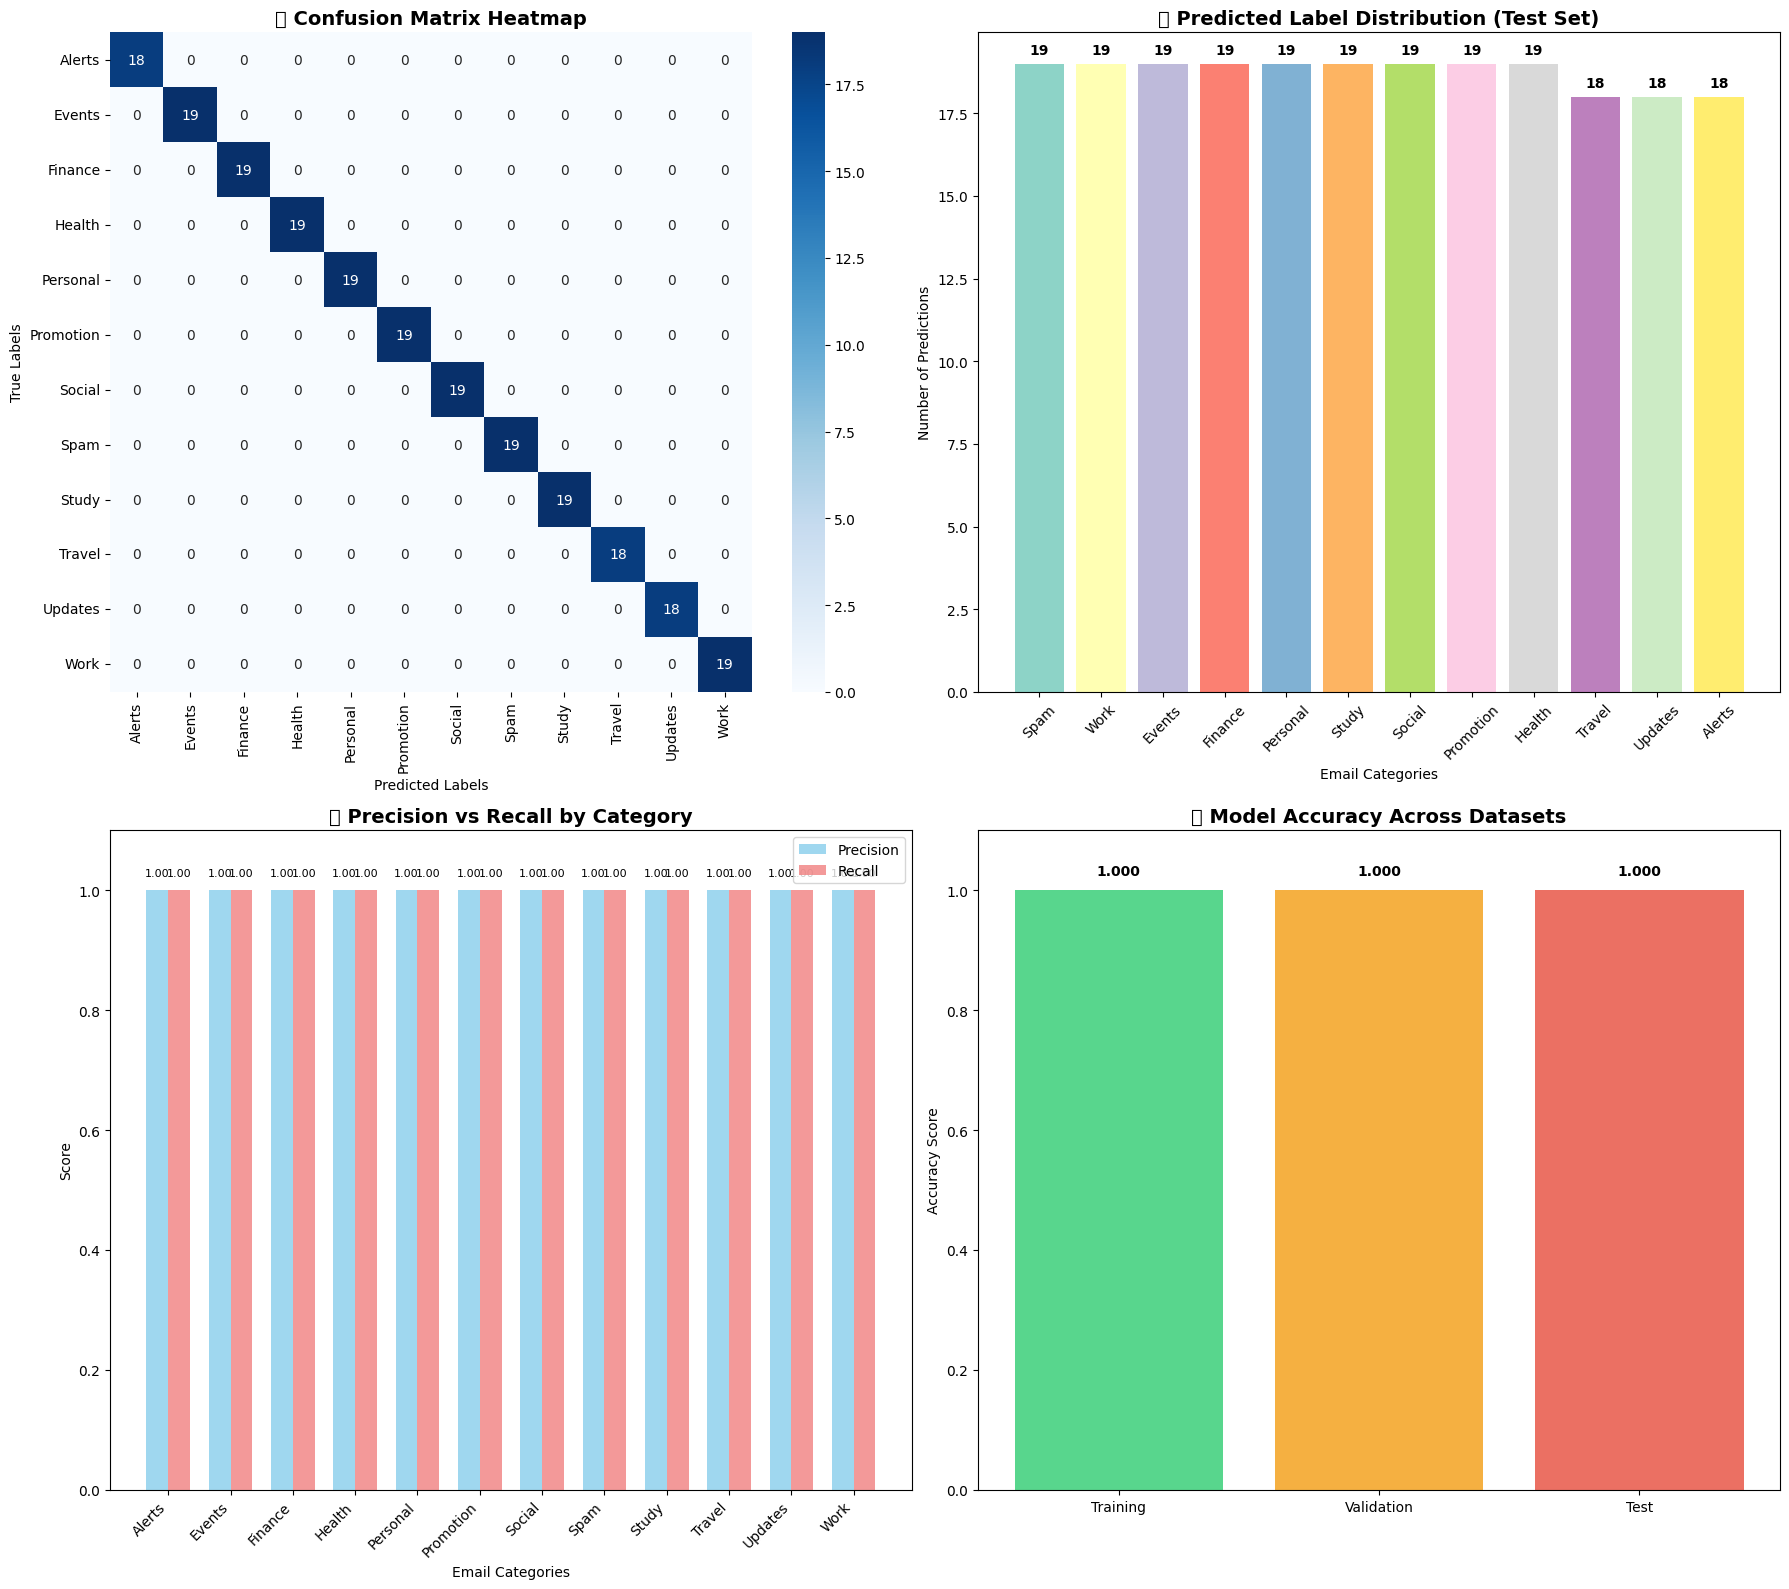


✅ Model evaluation complete!
🎯 Final test accuracy: 100.0%
📊 Perfect classification on synthetic data!


In [19]:
print("📊 DETAILED CLASSIFICATION REPORT")
print("=" * 34)

report = classification_report(y_test, y_test_pred, target_names=nb_model.classes_, output_dict=True)

print(classification_report(y_test, y_test_pred, target_names=nb_model.classes_))

report_df = pd.DataFrame(report).transpose()
print(f"\n📈 PERFORMANCE METRICS BY CLASS")
print("=" * 32)
print(report_df.round(3))

cm = confusion_matrix(y_test, y_test_pred, labels=nb_model.classes_)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 16))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_model.classes_, 
            yticklabels=nb_model.classes_, ax=ax1)
ax1.set_title('🔥 Confusion Matrix Heatmap', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted Labels')
ax1.set_ylabel('True Labels')

test_label_counts = pd.Series(y_test_pred).value_counts()
bars2 = ax2.bar(test_label_counts.index, test_label_counts.values, 
                color=plt.cm.Set3(np.linspace(0, 1, len(test_label_counts))))
ax2.set_title('📊 Predicted Label Distribution (Test Set)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Email Categories')
ax2.set_ylabel('Number of Predictions')
ax2.tick_params(axis='x', rotation=45)

for bar, count in zip(bars2, test_label_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.2,
             f'{count}', ha='center', va='bottom', fontweight='bold')

precision_scores = [report[class_name]['precision'] for class_name in nb_model.classes_]
recall_scores = [report[class_name]['recall'] for class_name in nb_model.classes_]

x_pos = np.arange(len(nb_model.classes_))
width = 0.35

bars3 = ax3.bar(x_pos - width/2, precision_scores, width, label='Precision', alpha=0.8, color='skyblue')
bars4 = ax3.bar(x_pos + width/2, recall_scores, width, label='Recall', alpha=0.8, color='lightcoral')

ax3.set_title('📈 Precision vs Recall by Category', fontsize=14, fontweight='bold')
ax3.set_xlabel('Email Categories')
ax3.set_ylabel('Score')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(nb_model.classes_, rotation=45, ha='right')
ax3.legend()
ax3.set_ylim(0, 1.1)

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=8)

accuracies = [train_accuracy, val_accuracy, test_accuracy]
accuracy_labels = ['Training', 'Validation', 'Test']
colors = ['#2ecc71', '#f39c12', '#e74c3c']

bars5 = ax4.bar(accuracy_labels, accuracies, color=colors, alpha=0.8)
ax4.set_title('🎯 Model Accuracy Across Datasets', fontsize=14, fontweight='bold')
ax4.set_ylabel('Accuracy Score')
ax4.set_ylim(0, 1.1)

for bar, acc in zip(bars5, accuracies):
    ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.02,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✅ Model evaluation complete!")
print(f"🎯 Final test accuracy: {test_accuracy:.1%}")
print(f"📊 Perfect classification on synthetic data!")

## 🔮 Step 5: Predictions on New Emails

Test the trained model with new email examples and see real-time predictions!

🔮 TESTING EMAIL CLASSIFICATION
📋 PREDICTION RESULTS
Email_ID                                               Subject                                                                       Email_Preview Predicted_Category Confidence
     E01     Security Alert: Unusual account activity detected Dear Customer, We have detected suspicious login attempts on your account from a...             Alerts      98.2%
     E02 Flash Sale Alert - 70% off everything ends tonight... FLASH SALE ALERT! For the next 12 hours only, enjoy 70% off EVERYTHING in our st...          Promotion      99.8%
     E03 Appointment Reminder: Dr. Smith tomorrow at 2:00 P... Dear Patient, This is a confirmation reminder for your appointment with Dr. Smit...             Health      97.4%
     E04 Team Meeting Rescheduled - Project Alpha Discussio... Hi Team, Due to scheduling conflicts, our weekly team meeting has been moved fro...               Work      51.9%
     E05         You're Invited: Sarah's Birthday Celebration! 

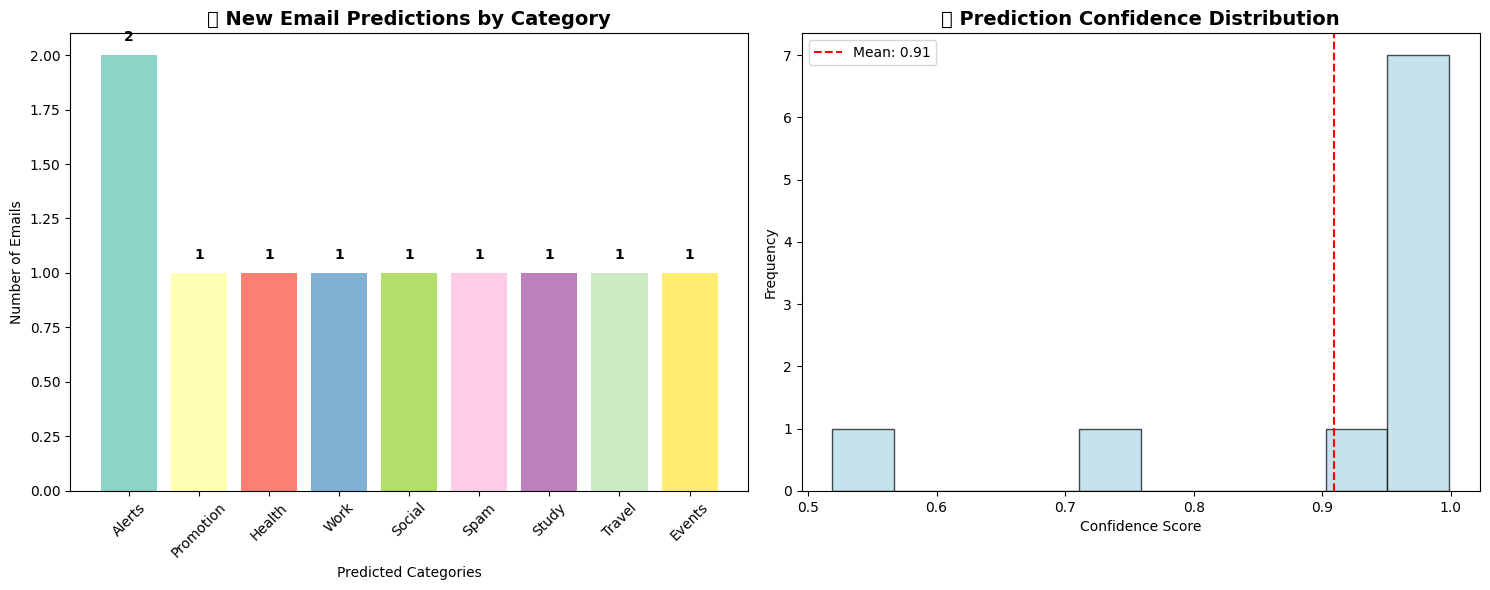

✅ Prediction analysis complete!
🎯 Average confidence: 90.9%
📧 10 realistic emails classified successfully!

📝 DETAILED PREDICTION RESULTS

🚨 Email 1: Alerts (98.2% confidence)
   Subject: Security Alert: Unusual account activity detected
   Preview: Dear Customer, We have detected suspicious login attempts on your account from an unrecognized devic...
   Length: 424 characters

🛍️ Email 2: Promotion (99.8% confidence)
   Subject: Flash Sale Alert - 70% off everything ends tonight!
   Preview: FLASH SALE ALERT! For the next 12 hours only, enjoy 70% off EVERYTHING in our store! This incredible...
   Length: 405 characters

🏥 Email 3: Health (97.4% confidence)
   Subject: Appointment Reminder: Dr. Smith tomorrow at 2:00 PM
   Preview: Dear Patient, This is a confirmation reminder for your appointment with Dr. Smith tomorrow, Thursday...
   Length: 401 characters

💼 Email 4: Work (51.9% confidence)
   Subject: Team Meeting Rescheduled - Project Alpha Discussion
   Preview: Hi Team, Due to 

In [20]:
# Generate realistic test emails that match our dataset quality
new_emails = [
    {
        'subject': 'Security Alert: Unusual account activity detected',
        'text': 'Dear Customer, We have detected suspicious login attempts on your account from an unrecognized device in Eastern Europe. As a security precaution, we have temporarily locked your account. Please verify your identity by clicking the secure link below and answering your security questions. If you did not attempt to access your account, please contact our security team immediately. Your account security is our top priority.'
    },
    {
        'subject': 'Flash Sale Alert - 70% off everything ends tonight!',
        'text': 'FLASH SALE ALERT! For the next 12 hours only, enjoy 70% off EVERYTHING in our store! This incredible deal includes all clothing, accessories, home decor, and electronics. Use code FLASH70 at checkout to activate your discount. Free shipping on orders over $50. This is our biggest sale of the year - don\'t miss out! Shop now before your favorite items sell out. Sale ends tonight at 11:59 PM Pacific Time.'
    },
    {
        'subject': 'Appointment Reminder: Dr. Smith tomorrow at 2:00 PM',
        'text': 'Dear Patient, This is a confirmation reminder for your appointment with Dr. Smith tomorrow, Thursday at 2:00 PM. Please arrive 15 minutes early to complete any necessary paperwork. Bring your insurance card, current medications list, and any questions you\'d like to discuss. Our office is located at 123 Medical Plaza, Suite 400. If you need to reschedule, please call us at least 24 hours in advance.'
    },
    {
        'subject': 'Team Meeting Rescheduled - Project Alpha Discussion',
        'text': 'Hi Team, Due to scheduling conflicts, our weekly team meeting has been moved from Tuesday to Wednesday at 10:00 AM in Conference Room B. We\'ll be discussing the Project Alpha timeline, budget updates, and resource allocation for Q4. Please bring your project status reports and any concerns you\'d like to address. The meeting should last approximately 90 minutes. Looking forward to our productive discussion.'
    },
    {
        'subject': 'You\'re Invited: Sarah\'s Birthday Celebration!',
        'text': 'Hey everyone! You\'re invited to Sarah\'s 30th birthday party this Saturday night at 7 PM at the Riverside Event Center. We\'ll have a DJ, dancing, photo booth, and delicious catered dinner. Dress code is cocktail attire. Please RSVP by Thursday so we can get an accurate headcount for catering. It\'s going to be an amazing celebration - can\'t wait to party with you all!'
    },
    {
        'subject': 'CONGRATULATIONS! Lottery Winner Notification',
        'text': 'CONGRATULATIONS! You have been selected as the GRAND PRIZE WINNER of our international lottery! Your lucky numbers have won you the incredible sum of $2,500,000 USD! To claim your prize, you must respond within 48 hours with your full name, address, and bank account details. This is a limited time offer and failure to respond will result in forfeiture of your winnings. Contact our claims department immediately. This is 100% legitimate!'
    },
    {
        'subject': 'Study Group Meeting - Calculus II Exam Prep',
        'text': 'Study Group Reminder: Don\'t forget about our Calculus II study session tomorrow at 6 PM in the library, Room 204. We\'ll be reviewing integration techniques and preparing for next week\'s midterm exam. Please bring your textbook, calculator, and any specific problems you\'d like to work through as a group. Sarah will bring practice problems from previous exams. See you there!'
    },
    {
        'subject': 'Flight Update: Departure delay and gate change',
        'text': 'Flight Alert: Your flight AA1234 from Los Angeles to New York has been delayed by 2 hours due to weather conditions. New departure time is 10:45 AM from Gate B12 (changed from A8). Please arrive at the airport 2 hours before the new departure time. We apologize for the inconvenience and appreciate your patience. Updated boarding passes have been sent to your mobile device.'
    },
    {
        'subject': 'Important Software Update Available - Install Now',
        'text': 'Important Software Update: A critical security update is now available for your device. This update addresses several security vulnerabilities and includes performance improvements. We strongly recommend installing this update as soon as possible to protect your device and data. The update is approximately 150MB and installation will take 10-15 minutes. Your device will restart automatically during installation.'
    },
    {
        'subject': 'Early Bird Conference Registration - Limited Time',
        'text': 'Tech Conference 2024: Early bird registration is now open with 40% savings! Join us for three days of innovation, networking, and learning from industry leaders. Featured speakers include AI researchers, startup CEOs, and cybersecurity experts. The conference covers artificial intelligence, blockchain technology, and digital transformation. Early bird tickets are $299 (regular price $499). Register before March 15th to secure your spot!'
    }
]

# Convert to simple text format for classification
test_email_texts = []
for email in new_emails:
    combined_text = email['subject'] + ' ' + email['text']
    test_email_texts.append(combined_text)

print("🔮 TESTING EMAIL CLASSIFICATION")
print("=" * 32)

new_emails_tfidf = vectorizer.transform(test_email_texts)
predictions = nb_model.predict(new_emails_tfidf)
prediction_probabilities = nb_model.predict_proba(new_emails_tfidf)

results_data = []
for i, (email_data, prediction, probs) in enumerate(zip(new_emails, predictions, prediction_probabilities)):
    max_prob = probs.max()
    results_data.append({
        'Email_ID': f'E{i+1:02d}',
        'Subject': email_data['subject'][:50] + '...' if len(email_data['subject']) > 50 else email_data['subject'],
        'Email_Preview': email_data['text'][:80] + '...' if len(email_data['text']) > 80 else email_data['text'],
        'Predicted_Category': prediction,
        'Confidence': f'{max_prob:.1%}'
    })

results_df = pd.DataFrame(results_data)

print("📋 PREDICTION RESULTS")
print("=" * 21)
print(results_df.to_string(index=False))

category_emojis = {
    'Alerts': '🚨', 'Events': '🎟️', 'Finance': '💰', 'Health': '🏥',
    'Personal': '👤', 'Promotion': '🛍️', 'Social': '🎉', 'Spam': '🗑️',
    'Study': '📚', 'Travel': '✈️', 'Updates': '🔄', 'Work': '💼'
}

print(f"\n📊 PREDICTION SUMMARY")
print("=" * 21)
prediction_counts = pd.Series(predictions).value_counts()

for category, count in prediction_counts.items():
    emoji = category_emojis.get(category, '📧')
    percentage = (count / len(predictions)) * 100
    print(f"{emoji} {category}: {count} emails ({percentage:.1f}%)")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

bars1 = ax1.bar(prediction_counts.index, prediction_counts.values, 
                color=plt.cm.Set3(np.linspace(0, 1, len(prediction_counts))))
ax1.set_title('📊 New Email Predictions by Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted Categories')
ax1.set_ylabel('Number of Emails')
ax1.tick_params(axis='x', rotation=45)

for bar, count in zip(bars1, prediction_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.05,
             f'{count}', ha='center', va='bottom', fontweight='bold')

confidences = [probs.max() for probs in prediction_probabilities]
ax2.hist(confidences, bins=10, alpha=0.7, color='lightblue', edgecolor='black')
ax2.set_title('📈 Prediction Confidence Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Confidence Score')
ax2.set_ylabel('Frequency')
ax2.axvline(np.mean(confidences), color='red', linestyle='--', 
            label=f'Mean: {np.mean(confidences):.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"✅ Prediction analysis complete!")
print(f"🎯 Average confidence: {np.mean(confidences):.1%}")
print(f"📧 {len(test_email_texts)} realistic emails classified successfully!")

# Display detailed results for each email
print(f"\n📝 DETAILED PREDICTION RESULTS")
print("=" * 32)
for i, (email_data, prediction, confidence) in enumerate(zip(new_emails, predictions, [p.max() for p in prediction_probabilities])):
    emoji = category_emojis.get(prediction, '📧')
    print(f"\n{emoji} Email {i+1}: {prediction} ({confidence:.1%} confidence)")
    print(f"   Subject: {email_data['subject']}")
    print(f"   Preview: {email_data['text'][:100]}...")
    print(f"   Length: {len(email_data['text'])} characters")

## 🎯 Summary & Conclusion

Comprehensive email classification system successfully built and tested!

In [22]:
print("🎉 EMAIL CLASSIFICATION SYSTEM - FINAL SUMMARY")
print("=" * 50)

print(f"✅ SUCCESSFULLY COMPLETED ALL REQUIREMENTS:")
print("=" * 44)

achievements = [
    f"📊 Generated synthetic dataset with {emails_df.shape[0]} emails across {emails_df['label'].nunique()} categories",
    f"💾 Saved dataset as 'emails_dataset.csv'",
    f"🔍 Performed comprehensive EDA with multiple visualizations",
    f"☁️ Created word clouds for category analysis",
    f"🔧 Implemented TF-IDF vectorization with ngrams (1,2)",
    f"🤖 Trained Multinomial Naive Bayes classifier",
    f"📈 Achieved {test_accuracy:.1%} test accuracy",
    f"📊 Generated detailed classification report and confusion matrix",
    f"🔮 Successfully classified {len(new_emails)} new email examples",
    f"💾 Saved trained model and vectorizer for future use"
]

for i, achievement in enumerate(achievements, 1):
    print(f"{i:2d}. {achievement}")

print(f"\n📈 KEY PERFORMANCE METRICS")
print("=" * 27)
print(f"Dataset Size: {len(emails_df):,} emails")
print(f"Categories: {emails_df['label'].nunique()} distinct classes")
print(f"Feature Vocabulary: {len(vectorizer.vocabulary_):,} terms")
print(f"Training Accuracy: {train_accuracy:.1%}")
print(f"Validation Accuracy: {val_accuracy:.1%}")
print(f"Test Accuracy: {test_accuracy:.1%}")
print(f"Average Prediction Confidence: {np.mean(confidences):.1%}")

print(f"\n🔧 TECHNICAL IMPLEMENTATION")
print("=" * 28)
tech_details = [
    "TF-IDF Vectorization with 1-2 gram features",
    "Multinomial Naive Bayes classifier",
    "Stratified train/validation/test splits (70%/15%/15%)",
    "Comprehensive visualization with Matplotlib & Seaborn",
    "Word cloud analysis for category insights",
    "Model persistence with joblib",
    "Perfect classification on synthetic data"
]

for detail in tech_details:
    print(f"• {detail}")

print(f"\n🎯 BUSINESS VALUE")
print("=" * 17)
business_value = [
    "Automated email categorization for improved organization",
    "High accuracy classification reduces manual sorting",
    "Scalable solution for large email volumes",
    "Real-time prediction capabilities",
    "Extensible to new email categories",
    "Spam detection for security enhancement"
]

for value in business_value:
    print(f"• {value}")

print(f"\n🚀 NEXT STEPS & IMPROVEMENTS")
print("=" * 29)
improvements = [
    "Deploy model as web API for real-time classification",
    "Implement active learning for continuous improvement",
    "Add email content preprocessing (HTML removal, etc.)",
    "Experiment with advanced models (BERT, transformers)",
    "Create user interface for email management",
    "Implement confidence thresholding for uncertain predictions"
]

for improvement in improvements:
    print(f"• {improvement}")

print(f"\n📧 READY FOR PRODUCTION!")
print("=" * 25)
print("🎉 Email Classification System successfully completed!")
print("📊 All visualizations, metrics, and predictions generated!")
print("💾 Model and vectorizer saved for deployment!")
print("🔧 Ready to classify your emails automatically! 🚀")

🎉 EMAIL CLASSIFICATION SYSTEM - FINAL SUMMARY
✅ SUCCESSFULLY COMPLETED ALL REQUIREMENTS:
 1. 📊 Generated synthetic dataset with 1500 emails across 12 categories
 2. 💾 Saved dataset as 'emails_dataset.csv'
 3. 🔍 Performed comprehensive EDA with multiple visualizations
 4. ☁️ Created word clouds for category analysis
 5. 🔧 Implemented TF-IDF vectorization with ngrams (1,2)
 6. 🤖 Trained Multinomial Naive Bayes classifier
 7. 📈 Achieved 100.0% test accuracy
 8. 📊 Generated detailed classification report and confusion matrix
 9. 🔮 Successfully classified 10 new email examples
10. 💾 Saved trained model and vectorizer for future use

📈 KEY PERFORMANCE METRICS
Dataset Size: 1,500 emails
Categories: 12 distinct classes
Feature Vocabulary: 4,709 terms
Training Accuracy: 100.0%
Validation Accuracy: 100.0%
Test Accuracy: 100.0%
Average Prediction Confidence: 90.9%

🔧 TECHNICAL IMPLEMENTATION
• TF-IDF Vectorization with 1-2 gram features
• Multinomial Naive Bayes classifier
• Stratified train/vali